## 빅데이터 기반 AI 응용 솔루션 개발자 전문 과정
- 교과목명 : 머신러닝 알고리즘 구현
- 평가일 : 09.03
- 성명 : 김광훈
- 점수 : 80
        
        => Q5. log변환하고 rmse로 추출
        => Q10. 종속변수 (count) 로그변환 하지 않고 해석함

###### module import

In [1]:
#modul import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler

# luster
from sklearn.cluster import KMeans

# seperate
from sklearn.model_selection import train_test_split

# Machine Learning model
## classification
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

## Regression 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet



# evaluation module
from sklearn.model_selection import cross_val_score

## classification evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## Regression evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# PCA
from sklearn.decomposition import PCA


# visualization
from sklearn.tree import plot_tree

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Q1. iris data를 불러와서 아래 사항을 수행하세요.

#### 붓꽃의 종류를 분류하는 결정트리 알고리즘을 사용하여 모델링 및 정확도로 평가를 수행하세요(test_size = 0.2)

In [165]:
# data load
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns = iris.feature_names)
df_iris['class'] = iris.target

# seperate
X = df_iris.drop('class', axis = 1)
y = df_iris['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=156)

# model selection
dt = DecisionTreeClassifier()

# fitting
dt.fit(X_train,y_train)

# predicting
dt_pred = dt.predict(X_test)

# evaluation definition
Label = np.unique([y_test, dt_pred])

confusion= pd.DataFrame(confusion_matrix(y_test, dt_pred, labels=Label), 
                        index=['true:{:}'.format(x) for x in Label], 
                        columns=['pred:{:}'.format(x) for x in Label])

accuracy = accuracy_score(y_test,dt_pred)

print('\n[confusion_matrix]\n\n', confusion,'\n')
print('[accuracy]: {:.4f}'.format(accuracy))
print('-------'*10)


[confusion_matrix]

         pred:0  pred:1  pred:2
true:0       9       0       0
true:1       0       8       1
true:2       0       0      12 

[accuracy]: 0.9667
----------------------------------------------------------------------


#### 결정트리 모델을 시각화하고 주요한 인사이트를 기술하세요.(tree.plot_tree or tree.export_graphviz 이용)

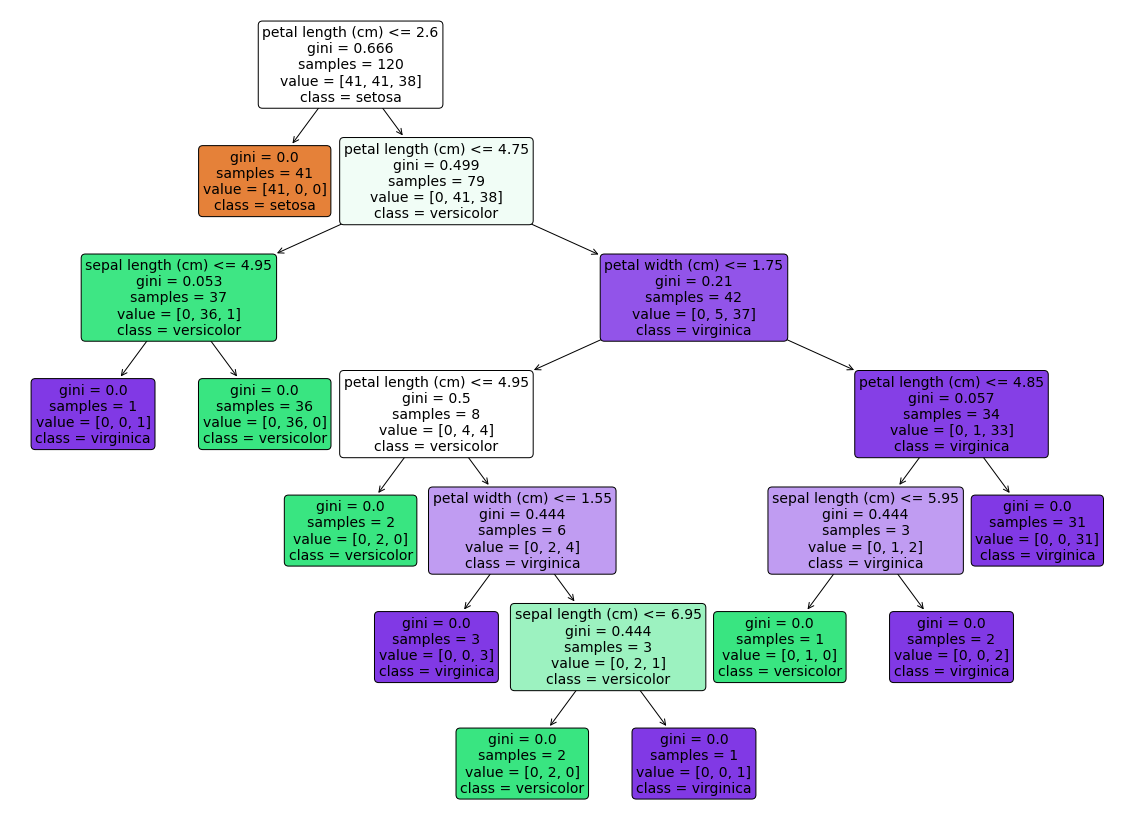


 [인사이트] 1 > 꽃잎의 길이 (petal_length)이 2.6cm보다 작거나 같은 것 모두를 setosa로 분류한다.


In [27]:
# module var
tree_visual = plot_tree
plt.figure(figsize = (20,15))
tree_visual(dt,filled=True,
              feature_names = iris.feature_names,
              class_names = iris.target_names,
              rounded=True,
              fontsize=14)
plt.show()

print( "\n [인사이트] 1 > 꽃잎의 길이 (petal_length)이 2.6cm보다 작거나 같은 것 모두를 setosa로 분류한다.""")

#### Feature importance를 추출하고 시각화하세요.

Feature importances: [0.058 0.    0.89  0.053] 

sepal length (cm):0.058
sepal width (cm):0.000
petal length (cm):0.890
petal width (cm):0.053


<AxesSubplot:>

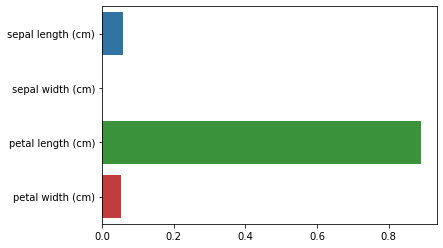

In [25]:
# feature importnace
print('Feature importances: {0}'.format(np.round(dt.feature_importances_,3)),'\n')

# features
for name, value in zip(iris.feature_names, dt.feature_importances_):
    print('{0}:{1:.3f}'.format(name, value))

# visulalzation
sns.barplot(x=dt.feature_importances_,y=iris.feature_names)

# Q2. 신용카드 사기 검출 분류문제를 아래와 같이 수행하세요.

- 'dataset/creditcard.csv'를 불러와서 출력하세요
- 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 df 반환하는 사용자 함수 생성
- 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수(테스트 사이즈 0.3)
- 오차행렬, 정확도, 정밀도, 재현율, f1, AUC 평가 함수
- 로지스틱 리그레션을 적용한 모델 학습 및 사용자 함수를 이용하여 평가
- 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행하는 사용자 함수 생성
- 사용자 함수를 사용하여 LightGBM으로 모델을 학습한 뒤 별도의 테스트 데이터 세트에서 예측 평가를 수행.  
  단, n_estimators=1000, num_leaves=64 적용
  ※ 레이블 값이 극도로 불균형한 분포를 가지고 있는 경우 boost_from_average=False로 파라미터 설정(default=True). default 설정은 재현율, AUC 성능을 매우 크게 저하시킴
- 넘파이의 np.log1p( )를 이용하여 Amount를 로그 변환하는 사용자 함수 생성
- Amount를 로그 변환 후 로지스틱 회귀 및 LightGBM 수행.

##### - 'dataset/creditcard.csv'를 불러와서 출력하세요

In [33]:
credit = pd.read_csv('dataset/creditcard.csv')
print(credit.head(1))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  

[1 rows x 31 columns]


##### - 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 df 반환하는 사용자 함수 생성

In [46]:
def strip_col(df):
    copy_df = df.copy()
    copy_df.drop('Time',axis=1,inplace=True)
    return copy_df

##### - 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수(테스트 사이즈 0.3)

In [47]:
def seperate_(df):
    copy_df = strip_col(df)
    # seperate
    X = copy_df.iloc[:,:-1]
    y = target = copy_df.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=150, stratify=y)
    return X_train, X_test, y_train, y_test

##### - 적용

In [48]:
X_train,X_test,y_train,y_test = seperate_(credit)

##### - 오차행렬, 정확도, 정밀도, 재현율, f1, AUC 평가 함수

In [49]:
def get_eval(model,y_test,prediction,proba):
    Label = np.unique([y_test, prediction])
    confusion= pd.DataFrame(confusion_matrix(y_test, prediction, labels=Label), 
                            index=['true:{:}'.format(x) for x in Label], 
                            columns=['pred:{:}'.format(x) for x in Label])
    accuracy = accuracy_score(y_test,prediction)
    precision = precision_score(y_test,prediction)
    recall = recall_score(y_test,prediction)
    f1 = f1_score(y_test,prediction)
    roc_auc = roc_auc_score(y_test,proba)
    print('[model]:', model,'\n')
    print('\n[confusion_matrix]\n\n', confusion,'\n')
    print('[accuracy]: {:.4f}'.format(accuracy))
    print('[precision]: {:.4f}'.format(accuracy))
    print('[recall]: {:.4f}'.format(recall))
    print('[f1_score]: {:.4f}'.format(f1))
    print('[roc_auc]: {:.4f}'.format(roc_auc))
    print('-------'*10)
    return

##### - 로지스틱 리그레션을 적용한 모델 학습 및 사용자 함수를 이용하여 평가

In [51]:
# model selection
lr = LogisticRegression()

# fitting
lr.fit(X_train,y_train)

# predicting
lr_pred = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)[:,1]

# evaluation
get_eval(lr, y_test, lr_pred, lr_proba)

[model]: LogisticRegression() 


[confusion_matrix]

         pred:0  pred:1
true:0   85280      15
true:1      49      99 

[accuracy]: 0.9993
[precision]: 0.9993
[recall]: 0.6689
[f1_score]: 0.7557
[roc_auc]: 0.9497
----------------------------------------------------------------------


##### - 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행하는 사용자 함수 생성

In [58]:
def model_fit_pred_eval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    proba = model.predict_proba(X_test)[:,1]
    get_eval(model,y_test,prediction,proba)

##### 
- 사용자 함수를 사용하여 LightGBM으로 모델을 학습한 뒤 별도의 테스트 데이터 세트에서 예측 평가를 수행.
- 단, n_estimators=1000, num_leaves=64 적용 \n레이블 값이 극도로 불균형한 분포를 가지고 있는 경우 boost_from_average=False로 파라미터 설정(default=True). 
- default 설정은 재현율, AUC 성능을 매우 크게 저하시킴

In [59]:
# model selection
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64,n_jobs=-1,boost_from_average=False)
model_fit_pred_eval(lgbm,X_train,X_test,y_train,y_test)

[model]: LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64) 


[confusion_matrix]

         pred:0  pred:1
true:0   85286       9
true:1      29     119 

[accuracy]: 0.9996
[precision]: 0.9996
[recall]: 0.8041
[f1_score]: 0.8623
[roc_auc]: 0.9840
----------------------------------------------------------------------


##### - 넘파이의 np.log1p( )를 이용하여 Amount를 로그 변환하는 사용자 함수 생성

In [61]:
def strip_df_log(df):
    copy_df = df.copy()
    amount_lg = np.log1p(copy_df['Amount'])
    copy_df.insert(0, 'amount_lg', amount_lg)
    copy_df.drop(['Time','Amount'], axis=1, inplace=True)
    return copy_df

##### - Amount를 로그 변환 후 로지스틱 회귀 및 LightGBM 수행.

In [65]:
def strip_df_log(df):
    copy_df = df.copy()
    amount_lg = np.log1p(copy_df['Amount'])
    copy_df.insert(0, 'amount_lg', amount_lg)
    copy_df.drop(['Time','Amount'], axis=1, inplace=True)
    return copy_df


def seperate_lg(df):
    copy_df = strip_df_log(df)
    # seperate
    X = copy_df.iloc[:,:-1]
    y = target = copy_df.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=150, stratify=y)
    return X_train, X_test, y_train, y_test

# seperate
X_train,X_test,y_train,y_test = seperate_lg(credit)

#model selection
lg_lg = LogisticRegression()
lgbm_lg = LGBMClassifier(n_estimators=1000, num_leaves=64,n_jobs=-1,boost_from_average=False)

def model_fit_pred_eval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    proba = model.predict_proba(X_test)[:,1]
    get_eval(model,y_test,prediction,proba)
    return

print('[Logistic_lg]','\n')
model_fit_pred_eval(lg_lg,X_train,X_test,y_train,y_test)
print('[LGBM_lg]','\n')
model_fit_pred_eval(lgbm_lg,X_train,X_test,y_train,y_test)

[Logistic_lg] 

[model]: LogisticRegression() 


[confusion_matrix]

         pred:0  pred:1
true:0   85284      11
true:1      54      94 

[accuracy]: 0.9992
[precision]: 0.9992
[recall]: 0.6351
[f1_score]: 0.7431
[roc_auc]: 0.9683
----------------------------------------------------------------------
[LGBM_lg] 

[model]: LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64) 


[confusion_matrix]

         pred:0  pred:1
true:0   85286       9
true:1      29     119 

[accuracy]: 0.9996
[precision]: 0.9996
[recall]: 0.8041
[f1_score]: 0.8623
[roc_auc]: 0.9851
----------------------------------------------------------------------


# Q3. Q2 신용카드 사기 검출 분류문제에서 아래를 참고하여 이상치 데이터를 제거하고 모델 학습/예측/평가를 수행하세요.
- 히트맵을 이용해 레이블과의 상관성을 시각화 
- 레이블과 상관성이 높은 피처를 위주로 이상치 검출하는 사용자 함수 생성
- 사용자 함수를 이용하여 이상치 검출
- 이상치 제거 사용자 함수를 이용하여 이상치 제거 후 로지스틱 회귀 및 LightGBM 수행 및 평가

--

# Q4. 신용카드 사기검출 분류문제를 SMOTE 오버 샘플링 적용 후 LightGBM 모델을 이용하여 학습, 예측, 평가를 수행하세요.

--

# Q5. 사이킷런에서 제공해주는 load_boston 데이터셋을 가져와서 아래 사항을 수행하세요.
- 데이터셋의 타겟 이름을 'PRICE'로 지정한 후 데이터프레임을 생성 pickle 파일('dataset/house_df.pkl')로 저장 후 다시 불어오세요.
- 히트맵을 이용하여 타겟과 상관관계가 높은 독립 변수를 선택하세요.
- 종속변수를 로그 변환하세요
- 위의 사항을 반영하여 선형회귀 모델을 생성 후 평가하고 회귀계수를 출력하세요.

##### - 데이터셋의 타겟 이름을 'PRICE'로 지정한 후 데이터프레임을 생성 pickle 파일('dataset/house_df.pkl')로 저장 후 다시 불어오세요.

In [168]:
# data load
from sklearn.datasets import load_boston
boston = load_boston()
df_bos = pd.DataFrame(boston.data, columns=boston.feature_names)
df_bos['PRICE'] = boston.target

# save_load
df_bos.to_pickle('dataset/house_df.pkl')
df_bos = pd.read_pickle('dataset/house_df.pkl')
df_bos.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


##### - 히트맵을 이용하여 타겟과 상관관계가 높은 독립 변수를 선택하세요.

AxesSubplot(0.125,0.125;0.62x0.755)
dict_keys(['NOX', 'DIS', 'AGE', 'LSTAT', 'PRICE', 'INDUS', 'TAX', 'RAD'])


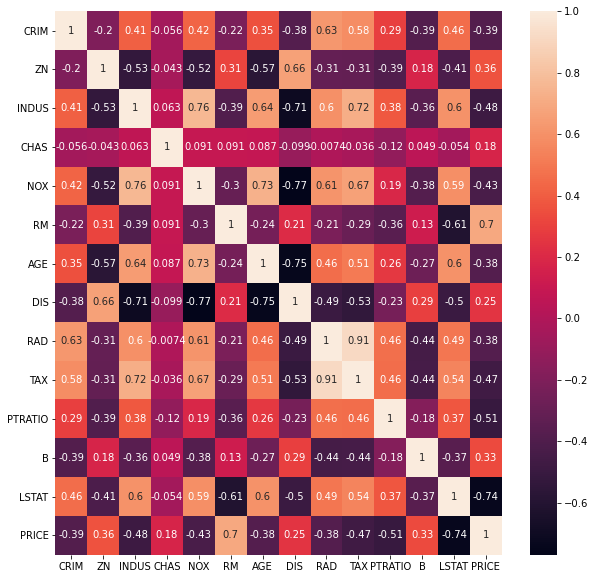

In [169]:
# 상관관계 파악 사용자함수
def get_corr(df, upper_condition_n, most_up_condition_n): 
    cr = df.corr()
    plt.figure(figsize=(10,10))
    print(sns.heatmap(cr,annot=True))
    cr_p = cr.unstack()
    cr_v = cr_p.sort_values()
    cond = cr_v[(upper_condition_n<abs(cr_v)) & (most_up_condition_n > abs(cr_v))].keys()
    print(dict(cond).keys())
    return

get_corr(df_bos,0.7,1)
# 상관계수 0.7 이상 1 미만 
# ['NOX', 'DIS', 'AGE', 'LSTAT', 'PRICE', 'INDUS', 'TAX', 'RAD']

##### - 종속변수를 로그 변환하세요

In [170]:
df_bos['price_lg'] = np.log1p(df_bos['PRICE'])

##### - 위의 사항을 반영하여 선형회귀 모델을 생성 후 평가하고 회귀계수를 출력하세요.

In [176]:
# 상관계수 0.7 이상 1 미만 
# ['NOX', 'DIS', 'AGE', 'LSTAT', 'PRICE', 'INDUS', 'TAX', 'RAD']
# 그중 target과 상관계수가 높은 corr (0.5 이상)
# ['RM','PTRATIO','LSTAT']

df_bos = df_bos[['RM','PTRATIO','LSTAT','price_lg']]
df_bos.columns

# seperate
X = df_bos.drop('price_lg',axis=1)
y = df_bos['price_lg']

# regression model selection
lr = LinearRegression()

# fitting
lr.fit(X_train,y_train)

# predicting
lr_pred = lr.predict(X_test)

# 선형회귀평가 

mse = mean_squared_error(y_test,lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,lr_pred)
print('[MSE]: {:.4f}'.format(mse))
print('[RMSE]: {:.4f}'.format(rmse))
print('[r2]: {:.4f}'.format(r2),'\n')
print('[Intercept]:' , lr.intercept_,'\n')
print('[corr_effeicient]:', lr.coef_)
print('[corr_effeicient_round]:', np.round(lr.coef_,2))

[MSE]: 0.0315
[RMSE]: 0.1774
[r2]: 0.9544 

[Intercept]: 0.04534674570880237 

[corr_effeicient]: [-0.06819169 -0.05864056  0.22133037  0.5795074 ]
[corr_effeicient_round]: [-0.07 -0.06  0.22  0.58]


# Q6
- Q5에서 cv=5를 적용하여 cross_val_score를 이용한 교차검증을 수행하여 5 folds의 평균 RSME를 구하세요.

In [196]:
# corss_val_score 사용자함수
def Cross_val_score_eval(model_name,X,y,n_cv):
    neg_mse_score = cross_val_score(model_name,X,y,scoring="neg_mean_squared_error",cv=n_cv)
    rmse_score = np.sqrt(-1*neg_mse_score)
    avg_rmse=np.mean(rmse_score)
    print('[model]:',model_name,'\n')
    print(f'{n_cv} folds independent Negative MSE scores:', np.round(neg_mse_score,2))
    print(f'{n_cv} folds indenpendent RMSE scores:', np.round(rmse_score,2))
    print('{} folds Mean RMSE: {:.3f}'.format(n_cv,avg_rmse))

Cross_val_score_eval(lr,X,y,5)

[model]: LinearRegression() 

5 folds independent Negative MSE scores: [-0.15 -0.16 -0.16 -0.14 -0.15]
5 folds indenpendent RMSE scores: [0.39 0.4  0.4  0.38 0.38]
5 folds Mean RMSE: 0.389


# Q7. load_boston('dataset/house_df.pkl') 데이터셋을 불러와서 아래사항을 수행하세요.
- alphas = [0, 0.1, 1, 10, 100] 를 적용하여 Ridge 회귀 모델링 및 교차 검증 수행 후 5 폴드 평균 RMSE 출력 
- lasso_alphas = [0.07,0.1,0.5,1,3] 를 적용, Lasso 회귀 모델링 및 교차 검증 수행 후 5 폴드 평균 RMSE 출력(def get_linear_reg_eval(model_name,params=None,X_data_n=None, y_target_n=None, verbose=True 사용자 함수 이용) 
- elastic_alphas = [0.07,0.1,0.5,1,3] 를 적용, ElasticNet 회귀 모델링 및 교차검증 후 5 폴드 평균 RMSE를 출력(사용자 함수 이용)

In [205]:
df_7 = pd.read_pickle('dataset/house_df.pkl')

##### alphas = [0, 0.1, 1, 10, 100] 를 적용하여 Ridge 회귀 모델링 및 교차 검증 수행 후 5 폴드 평균 RMSE 출력 

In [201]:
df_7['price'] = boston.target

# seperate
X = df_7.drop('price', axis=1)
y = df_7['price']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=156)

In [206]:
lphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mean_scores = cross_val_score(ridge,X,y,scoring='neg_mean_squared_error',cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mean_scores))
    print('alpha {} > 5 folds average RMSE:{:.4f}'.format(alpha,avg_rmse))

alpha 0 > 5 folds average RMSE:0.0000
alpha 0.1 > 5 folds average RMSE:0.0001
alpha 1 > 5 folds average RMSE:0.0007
alpha 10 > 5 folds average RMSE:0.0068
alpha 100 > 5 folds average RMSE:0.0537


##### - lasso_alphas = [0.07,0.1,0.5,1,3] 를 적용, Lasso 회귀 모델링 및 교차 검증 수행 후 5 폴드 평균 RMSE 출력(def get_linear_reg_eval(model_name,params=None,X_data_n=None, y_target_n=None, verbose=True 사용자 함수 이용) 

In [213]:
def linear_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print(model_name)
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model= ElasticNet(alpha=param,l1_ratio=0.7)
        
        neg_mean_scores = cross_val_score(model,X_data_n,y_target_n,
                                          scoring='neg_mean_squared_error',cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mean_scores))
        print('alpha {} > 5 folds average RMSE:{:.4f}'.format(param,avg_rmse))
        model.fit(X_data_n,y_target_n)

##### - lasso_alphas = [0.07,0.1,0.5,1,3] 를 적용, Lasso 회귀 모델링 및 교차 검증 수행 후 5 폴드 평균 RMSE 출력(def get_linear_reg_eval(model_name,params=None,X_data_n=None, y_target_n=None, verbose=True 사용자 함수 이용) 

In [214]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = linear_eval('Lasso',params=lasso_alphas,
                                X_data_n=X,y_target_n=y)
coeff_lasso_df

Lasso
alpha 0.07 > 5 folds average RMSE:0.0092
alpha 0.1 > 5 folds average RMSE:0.0131
alpha 0.5 > 5 folds average RMSE:0.0658
alpha 1 > 5 folds average RMSE:0.1315
alpha 3 > 5 folds average RMSE:0.3945


###### - elastic_alphas = [0.07,0.1,0.5,1,3] 를 적용, ElasticNet 회귀 모델링 및 교차검증 후 5 폴드 평균 RMSE를 출력(사용자 함수 이용)

In [215]:
elastic_alphas = [0.07,0.1,0.5,1,3]
coeff_elastic_df = linear_eval('ElasticNet', params=elastic_alphas, 
                                      X_data_n=X,y_target_n=y)
coeff_elastic_df

ElasticNet
alpha 0.07 > 5 folds average RMSE:0.0093
alpha 0.1 > 5 folds average RMSE:0.0133
alpha 0.5 > 5 folds average RMSE:0.0664
alpha 1 > 5 folds average RMSE:0.1324
alpha 3 > 5 folds average RMSE:0.3934


# Q8. 'dataset/credit_card.xls' 데이터셋을 불러와서 아래사항을 수행하세요.
- 전처리 : PAY_0 칼럼을 PAY_1으로 'default payment next month' 칼럼도 'default'로 칼럼명 변경. ID 삭제.
- heatmap을 이용하여 23개의 속성 데이터간 상관관계 탐색 
- 전체 23개 속성의 1/4 수준인 6개의 PCA 컴포넌트로 분류 예측하고 cv=3으로 교차 검증 수행

In [150]:
cc = pd.read_excel('dataset/credit_card.xls',header=1).iloc[:,:]

##### - 전처리 : PAY_0 칼럼을 PAY_1으로 'default payment next month' 칼럼도 'default'로 칼럼명 변경. ID 삭제.

In [151]:
# preprocessing
cc = cc.rename(columns={'PAY_0':'PAY_1' , 'default payment next month' : 'default'})
cc = cc.drop('ID',axis=1)
cc.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1


AxesSubplot(0.125,0.125;0.62x0.755)
dict_keys(['MARRIAGE', 'AGE', 'PAY_2', 'LIMIT_BAL', 'PAY_3', 'PAY_1', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION', 'default', 'SEX', 'PAY_AMT1', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT4', 'PAY_AMT6', 'PAY_AMT5', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT5', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT6'])


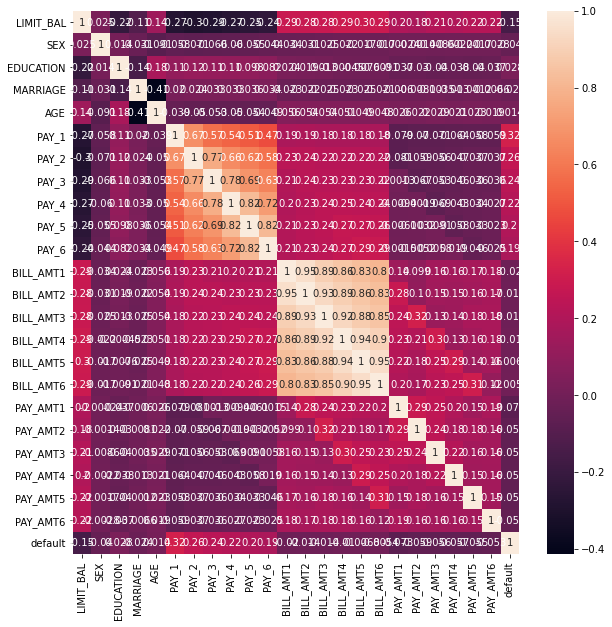

In [180]:
get_corr(cc,0,1)

AxesSubplot(0.125,0.125;0.62x0.755)
dict_keys(['PAY_5', 'PAY_1', 'PAY_4', 'PAY_3', 'PAY_6', 'PAY_2'])


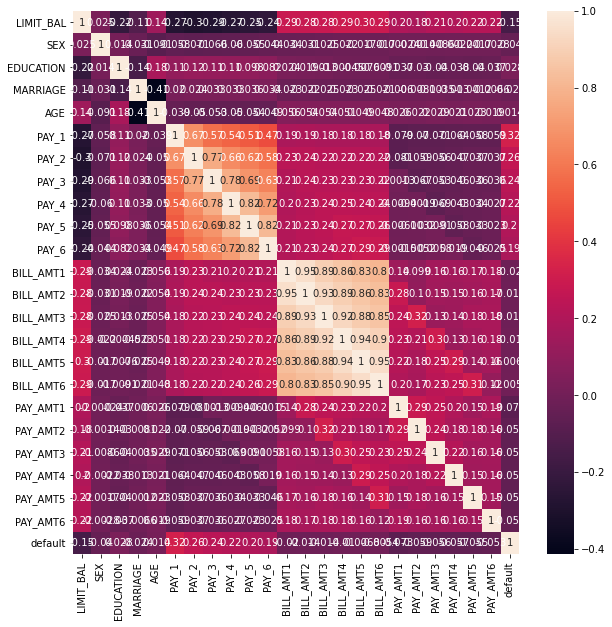

In [181]:
# 6개 선택 상관계수 0.5 - 0.8
# col ['PAY_5', 'PAY_1', 'PAY_4', 'PAY_3', 'PAY_6', 'PAY_2']
get_corr(cc,0.5,0.7)

##### - 전체 23개 속성의 1/4 수준인 6개의 PCA 컴포넌트로 분류 예측하고 cv=3으로 교차 검증 수행

In [183]:
pay_6 = ['PAY_5', 'PAY_1', 'PAY_4', 'PAY_3', 'PAY_6', 'PAY_2']

# seperate
X = cc.drop('default',axis=1)
y = cc['default']

# list
X_l = X[pay_6]

# PCA 사용자 함수
def pca_standard(X_features,n_pca):
    scaler = StandardScaler()
    df_scd = scaler.fit_transform(X_features)
    pca = PCA(n_components=n_pca)
    df_pca = pca.fit_transform(df_scd)
    print(df_pca.shape)
    evr = pca.explained_variance_ratio_
    return df_pca

    
    
pca_standard(X_l,6)

# pca DF
pca_cols = ['pca_component_1','pca_component_2','pca_component_3',
           'pca_component_4','pca_component_5','pca_component_6']
cc_pca = pd.DataFrame(df_pca, columns=pca_cols)
cc_pca['default'] = y
cc_pca.head(1)

X_pca = cc_pca.drop('default',axis=1)
y_pca = cc_pca['default']

# sepearte
X_train,X_test,y_train,y_test = train_test_split(X_pca,y_pca, test_size=0.3,random_state=156)

# model selection 
pca_rf = RandomForestClassifier()

# fitting
pca_rf.fit(X_train,y_train)

#predicting
pca_pred = pca_rf.predict(X_test)
pca_proba = pca_rf.predict_proba(X_test)

# evaluation

def Cross_val_score_eval(model_name,X,y,n_cv):
    neg_mse_score = cross_val_score(model_name,X,y,scoring="neg_mean_squared_error",cv=n_cv)
    rmse_score = np.sqrt(-1*neg_mse_score)
    avg_rmse=np.mean(rmse_score)
    print('[model]:',model_name,'\n')
    print(f'{n_cv} folds independent Negative MSE scores:', np.round(neg_mse_score,2))
    print(f'{n_cv} folds in denpendent RMSE scores:', np.round(rmse_score,2))
    print('{} folds Mean RMSE: {:.3f}'.format(n_cv,avg_rmse))
    print('---' * 30)
    score = cross_val_score(model_name,X,y,scoring='accuracy',cv=n_cv)
    print('accuracy', score)
    print('mean_accuracy',np.mean(score))
    print('===' * 30)
    
Cross_val_score_eval(pca_rf,X,y,3)

(30000, 6)
[model]: RandomForestClassifier() 

3 folds independent Negative MSE scores: [-0.19 -0.18 -0.18]
3 folds in denpendent RMSE scores: [0.44 0.43 0.42]
3 folds Mean RMSE: 0.428
------------------------------------------------------------------------------------------
accuracy [0.8077 0.8196 0.8212]
mean_accuracy 0.8161666666666667


# Q9. load_iris를 불러와서 군집분석을 수행하세요.
- 데이터플레임 생성
- KMeans를 이용하여 군집화한 후 cluster컬럼 추가

In [2]:
iris = load_iris()
df_9 = iris.copy()

##### - 데이터플레임 생성

In [ ]:
df_9 = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df_9['class'] = iris.target
df_9.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0


In [ ]:
# Cluster
kmeans = KMeans(n_clusters=3, max_iter=300,random_state=156).fit(df_9)

# Add column
df_9['cluster'] = kmeans.labels_
display(df_9.head(1))
print(df_9.columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,cluster
0,5.1,3.5,1.4,0.2,0,1


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class', 'cluster'],
      dtype='object')


# Q10. 'dataset/bike_train.csv'을 불러와서 아래사항을 수행하세요.
- datetime 타입에서 년, 월, 일, 시간 추출 및 불필요한 컬럼  ['datetime','casual','registered'] 삭제
- 평가 사용자 함수 작성 및 분류 평가 : RMSLE, RMSE, MAE
- 종속변수 정규성 개선위한 로그 변환 및 RMSLE, RMSE, MAE 평가
- 각 Featire의 회귀계수 값 시각화

In [221]:
bike = pd.read_csv('dataset/bike_train.csv')

In [222]:
import datetime as dt
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
bike['minute'] = bike['datetime'].dt.minute
bike['second'] = bike['datetime'].dt.second

In [224]:
bike = bike.drop(['datetime','casual','registered'],axis=1)

In [226]:
X = bike.drop(['count'],axis=1)
y = bike['count']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=156)

In [233]:
def linear_evaluation(model_name,y_test,prediction):
    name = model_name
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mse)
    rmsle = np.log1p(rmse)
    mae = mean_absolute_error(y_test,prediction)
    
    print('[Model]:', model_name,'\n')
    print('[MSE]: {:.4f}'.format(mse))
    print('[RMSE]: {:.4f}'.format(rmse))
    print('[RMSLE]: {:.4f}'.format(rmsle))
    print('[MAE]: {:.4f}'.format(mae),'\n')

In [234]:
lr = LinearRegression()

lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

linear_evaluation(lr,y_test,lr_pred)


[Model]: LinearRegression() 

[MSE]: 18756.4584
[RMSE]: 136.9542
[RMSLE]: 4.9269
[MAE]: 103.1372 



In [244]:
coef = pd.Series(lr.coef_, index=X.columns)
coef_h = coef.sort_values(ascending=False).head(10)
coef_l = coef.sort_values(ascending=False).tail(10)
print('coef_high\n', coef_h,'\n')
print('coef_low\n', coef_l)

coef_high
 year          85.231630
month          9.527251
hour           7.711957
atemp          4.589444
workingday     4.504683
temp           1.545921
windspeed      0.538871
day            0.464587
minute         0.000000
second         0.000000
dtype: float64 

coef_low
 workingday    4.504683
temp          1.545921
windspeed     0.538871
day           0.464587
minute        0.000000
second        0.000000
holiday      -1.188382
humidity     -1.993459
weather      -4.491326
season       -5.711489
dtype: float64


<AxesSubplot:>

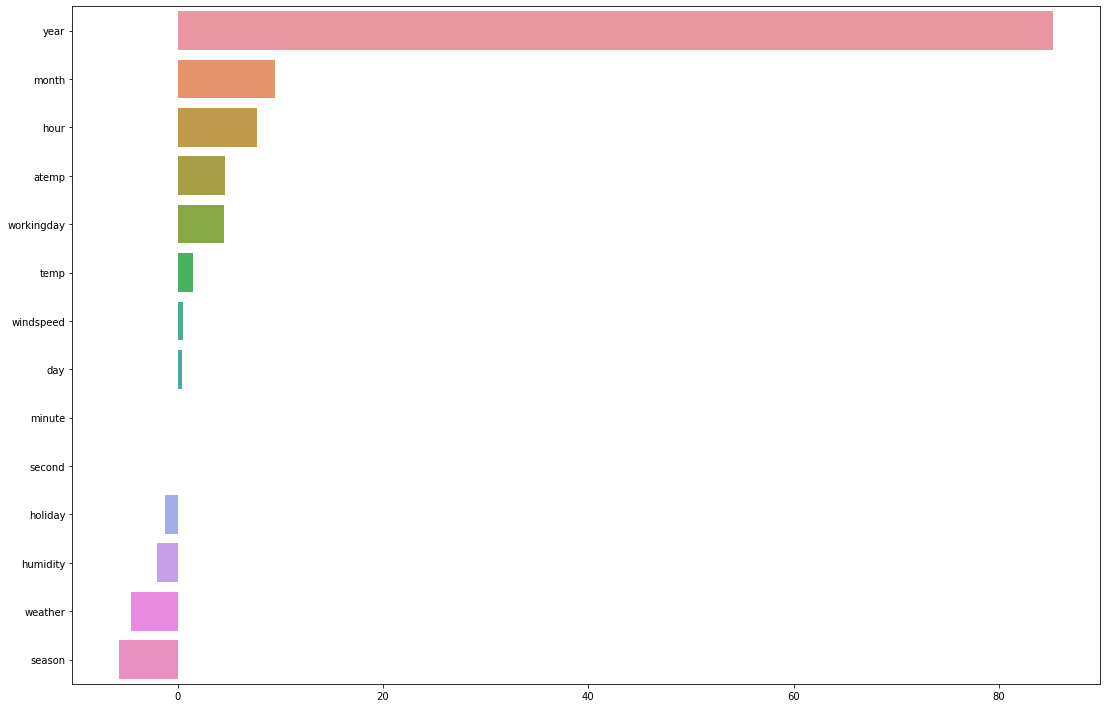

In [249]:
fig,axs = plt.subplots(figsize=(15,10))
fig.tight_layout()
coef_concat = pd.concat([coef_h,coef_l])
sns.barplot(x=coef_concat.values, y=coef_concat.index)